# Iris

Vamos a cargar los datos del Iris dataset. Si no se han cargado las dependencias sugiero seguir las [instrucciones de la creación del entorno Python](../docs/instalacion.md). Una vez dispongamos de un entorno virtual con las librerías podemos seleccionarlo para el kernel del notebook y ejecutar la siguiente celda.

In [1]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
X = data['data']
y = data['target']
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Podemos obtener lo que representa cada clase del campo `target_names`

In [4]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Uniremos las columnas para el análisis exploratorio.

In [5]:
iris = X.copy()
iris['class'] = y

In [6]:
iris['species'] = iris['class'].apply(lambda x: data['target_names'][0])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Renombramos para que sea más sencillo referenciar las columnas.

In [7]:
iris.rename(columns={
    'sepal length (cm)' : 'sepal_length',
    'sepal width (cm)' : 'sepal_width',
    'petal length (cm)' : 'petal_length',
    'petal width (cm)' : 'petal_width'
}, inplace=True)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

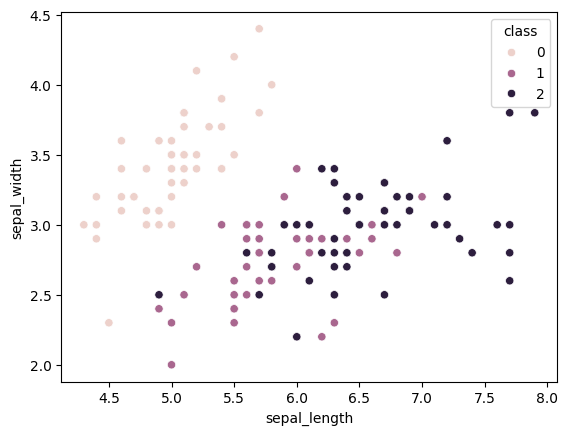

In [8]:
import seaborn as sns

sns.scatterplot(iris, x="sepal_length",y="sepal_width", hue='class')

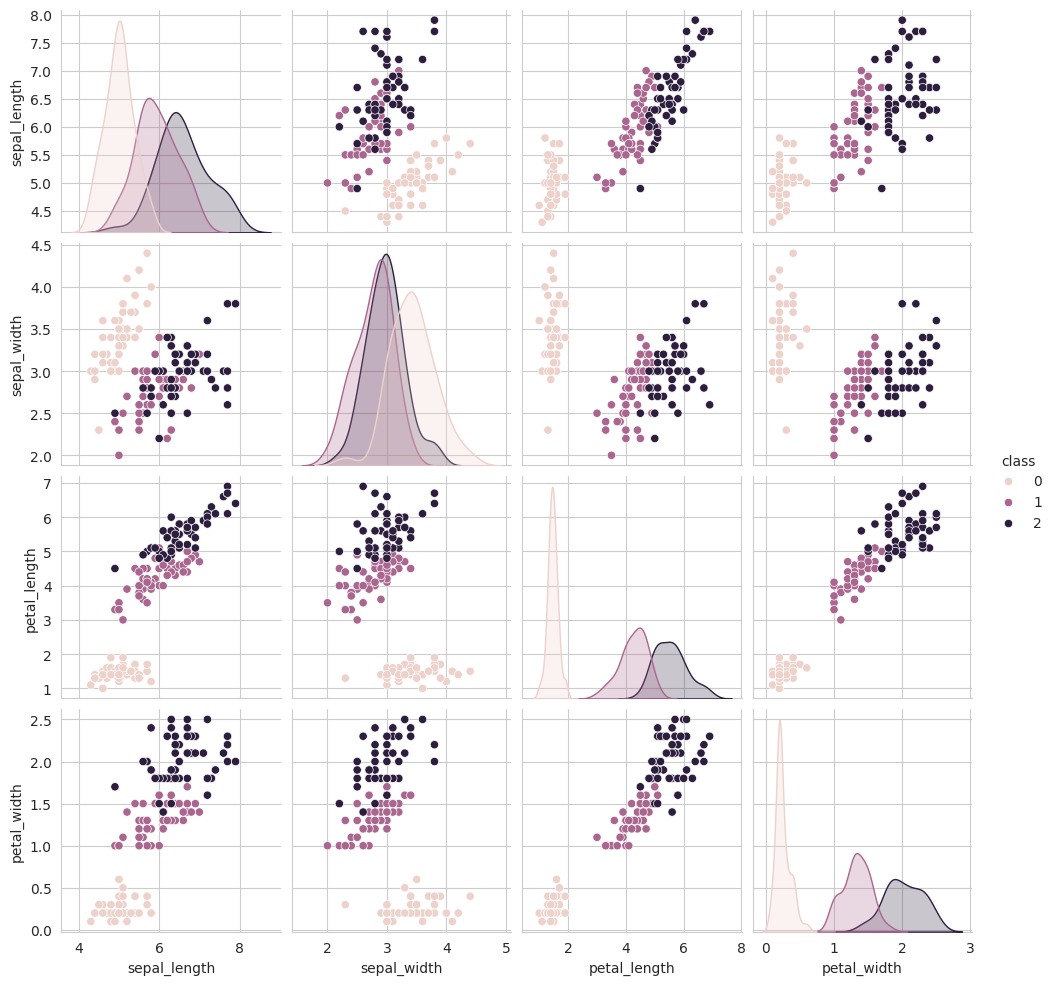

In [9]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid");
sns.pairplot(iris,hue="class");
plt.show()

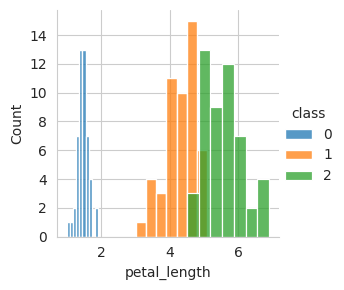

In [10]:
sns.FacetGrid(iris,hue="class") \
    .map(sns.histplot,"petal_length") \
    .add_legend();
    
plt.show();

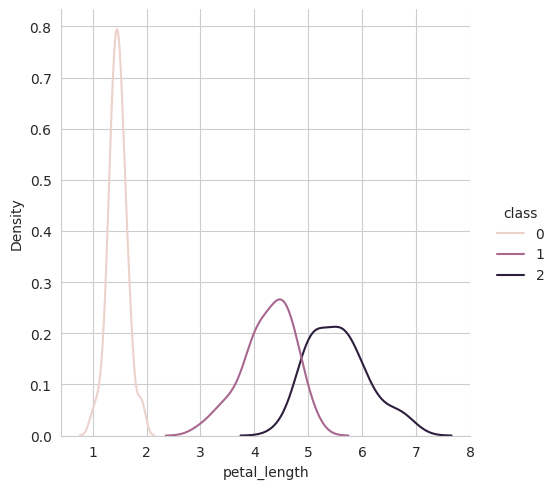

In [11]:
sns.displot(iris, x='petal_length', kind='kde', hue='class');

Se ve que tenemos suficientes datos para poder separar las tres muestras, o dos al menos. Hemos creado dos scripts bajo la ruta `src` para poder reutilizar el código de transformación de datos.

In [12]:
import os
import sys

sys.path.insert(0, os.path.abspath('../src'))

In [13]:
import process

process.preprocesado(iris[['class']])

column 'sepal_length' not in dataframe. Columns in dataframe: ['class']


In [14]:
df, scaler = process.preprocesado(iris)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [15]:
df.to_csv('../data/processed/scaled_data.csv', index=False)

Guardamos el modelo e escalado.

In [15]:
import joblib

joblib.dump(scaler, '../model/scaler.joblib')

['../model/scaler.joblib']

Procedemos a separarlos en train y test.

In [16]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.to_pickle('../data/train/features.pkl')
y_train.to_pickle('../data/train/target.pkl')

X_test.to_pickle('../data/test/features.pkl')
y_test.to_pickle('../data/test/target.pkl')